# NHANES Case study: 
We will use this example to show the functionality of the Rcupcake package when both, exposure and phenotype variables are present in the dataset.


## Introduction
The National Health and Nutrition Examination Survey (NHANES) project of the Centers for Disease Control and Prevention (CDC) has been one of the most impactful public health research projects of US. It has direct relevance to nutrition, pediatric growth, environmental exposures and even genetic components of health risk. NHANES comprises measurements over 41,474 individuals whore are selected to be demographically representative by CDC-sponsored researchers.

## Main Goal
Polychlorinated biphenyls (PCBs) are environmental pollutants that are detectable in the serum.  PCB 153 has the highest serum level among the PCBs. According to epidemiological studies, PCBs are known to be associated with different disorders. The goal of this study is to analyze whether different phenotype variables and phenotype co-occurrence are associated with PCB153 exposure. More specifically, we will answer the following questions:
   1. How can we query NHANES data through the BD2K PIC-SURE API RESTful API using R?
   2. What are the main demographic characteristics of our study population?
   3. What are the main phenotypic characteristics of our study population?
   4. Are the phenotype variables statistically associated with PCB153 exposure?
   5. What are the phenotype co-occurrences of patients with PCB153 exposure?

## Implementation

### `Rcupcake` package
The Rcupcake package enables the user to:
   1. Query through BD2K PIC-SURE RESTful API
   2. Explore the data from a demographic point of view
   3. Analyze the phenotype variables according to their different values, in terms of prevalence and co-occurrence
   4. Perform univariate analyses. 
   5. Describe the phenotype co-occurrence according to the patient exposure, such as PCB153 exposure


## Installation
`Rcupcake` is provided through GitHub. In order to install it, `devtools` package - available in CRAN (https://cran.r-project.org/) - is required. To install `devtools` the user must type the following commands in an R session:

In [26]:
#install.packages("devtools", repos="https://cran.r-project.org")
library(devtools)

Once `devtools` package has been installed the user can install `Rcupcake` typing the following commands in an R session:

In [27]:
#install_github("hms-dbmi/Rcupcake", force = TRUE)
library(knitr)
library(Rcupcake)

In [ ]:
install.packages(xml2)

## Questions that can be answered using `Rcupcake`


### Workflow
In order to answer the different questions, the steps will be:

    • Data retrieval
    • Descriptive demographics analysis
    • Descriptive phenotypic analysis
    • Univariate analysis
    • Phenotype co-occurrence: patients with exposure to PCB153




  <section data-markdown>
                    <img src="./nhanesWorkflow.png" | width =300/>
                </section>

# 1. How can we query NHANES data through the BD2K PIC-SURE RESTful API using `Rcupcake`?
We first select our study population: the subset of patients with available data regarding the age. Then, we select the variables that we want to retrieve for our analysis.
* PCB153
* Age
* Gender
* Diabetes
* Arthritis
* Liver cancer
* Any cancer

## 1.1 Start session
The first step in order to retrieve the data of interest is to start the session. `start.session` function of the `Rcupcake` package establishes the connection to the database. As input we need to determine the URL of the database (https://nhanes.hms.harvard.edu/) and the key to access the data. A key is provided in this case study to test it.




In [12]:
sessionEx <- start.session( 
              url         = "https://nhanes.hms.harvard.edu/", 
              apiKey      = "93t8i41s0puplh1mko37mnnm3v"
              )
sessionEx

[1] "Start Session: success"

Once the connection has been established the output message will be: _'Start Session: success'_. Otherwise the message: _'Start Session: failed. Please revise your url and apiKey' will appear_.


## 1.2 Get children paths
The second step consists of retrieving the paths of the location of each variable of interest. This step will allow creating the JSON query to retrieve the data. For this case study, we know that age and gender variables are under the demographics' folder, the PCB153 is under the laboratory/pcb folder and the phenotypes of interest are under the "/questionnaire/disease" path.

In order to retrieve the paths, we apply the 'get.children' function, determining for each case, the URL of the database (https://nhanes.hms.harvard.edu/) and the field name to access the data. At the end we will create one unique vector (nhanesVector) with the three previous ones.

In [13]:
nhanesDisease <- get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
   fieldname   = "/nhanes/Demo/questionnaire/questionnaire/disease/"
  )

nhanesDemographicPath <- get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
   fieldname   = "/nhanes/Demo/demographics/demographics/"
  )

nhanesPcb <- get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
   fieldname   = "/nhanes/Demo/laboratory/laboratory/pcbs/"
  )

nhanesVector <- c( nhanesDisease, nhanesDemographicPath, nhanesPcb)
head(nhanesVector)

[1] "/nhanes/Demo/questionnaire/questionnaire/disease/Any CAD (self report)/"                              
[2] "/nhanes/Demo/questionnaire/questionnaire/disease/Any cancer or malignancy?/"                          
[3] "/nhanes/Demo/questionnaire/questionnaire/disease/Any Diabetes (FBG >= 126 mg per dL or self-report)/" 
[4] "/nhanes/Demo/questionnaire/questionnaire/disease/Any family with heart attack or angina?/"            
[5] "/nhanes/Demo/questionnaire/questionnaire/disease/Any Hypertension? (BP >= 139 per 90 or self report)/"
[6] "/nhanes/Demo/questionnaire/questionnaire/disease/any_cad/"

## 1.3 Build the JSON query
Once the paths have been gathered , we can create the JSON query to retrieve the variables of interest. We apply the `my.query` function. The `my.query` function uses as input the URL of the database (https://nhanes.hms.harvard.edu/), the vector with the `get.children` function output and a vector with the variables of interest.

__Note that the first variable of the `myfield` vector will be the one that will be used for the where clause. In this example we want the subset of patients that have available data regarding the age, for this reason the AGE variable is the first item of the vector.__

In [14]:
queryExample <- my.query( myfields  = "AGE|PCB153|SEX|liver_cancer_self_report|Any Diabetes|Ever arthritis?|Any cancer or malignancy?", 
                          myvector  = nhanesVector, 
                          url       = "https://nhanes.hms.harvard.edu/"
              )
queryExample

{
  "select": [
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/questionnaire/disease/Any cancer or malignancy?/No/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/questionnaire/disease/Any cancer or malignancy?/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/questionnaire/disease/Any cancer or malignancy?/Yes/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/questionnaire/disease/Any cancer or malignancy?/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/questionnaire/disease/Any Diabetes (FBG >= 126 mg per dL or self-report)/No/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/questionnaire/disease/Any Diabetes (FBG >= 126 mg per dL or self-report)/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/questionnaire/disease/Any Diabetes (FBG >= 126 mg per dL or self-report)/Yes/",
        "data

## 1.4 Run the query
The last step to retrieve the data consists of applying the `my.data` function to the JSON query built previously. Given the URL of the database (https://nhanes.hms.harvard.edu/) and the JSON query, it generates a `data.frame` object with the query output. We have to select the output format and the path where the output will be located. Remember that by default it will be saved in the working directory.

In [15]:
query <- my.data( 
    query          = queryExample,
    url            = "https://nhanes.hms.harvard.edu/", 
    responseFormat = "CSV", 
    outputPath     = "./dataNHANES2.txt")


No encoding supplied: defaulting to UTF-8.


## 1.5 Transform the data.frame in `cupcakeData` object Run the query
Once the data is in a `data.frame` format, it has to be transformed into a `cupcakeData` class object in order to be analyzed with the `Rcupcake` package. Note that our example data contains:
* 3 demographic variables: patient_id, Gender and Age.
* 4 phenotype variables: diabetes, arthritis, liver cancer and any cancer.
* 1 variation variable, (here exposure): PCB153
    
In order to transform the data.frame into a `cupcakeData` object, we apply the `dataframe2cupcake` function. We need to specify:
* `input`: that determines the file with the complete path where the required input file is located.
* `phenotypes`: vector that contains phenotype variables, separated by "|".
* `variants`: vector that contains the names of variations, separated by "|".
* `age`: vector that contains the age variable name.
* `gender`: vector that contains the gender variable name.


In [16]:
data2b2 <- dataframe2cupcake( input = "./dataNHANES2.txt",
                              age        = "AGE",
                              gender     = "SEX",
                              phenotypes = "Diabetes|arthritis|liver_cancer|Any.cancer",
                              variants   = "PCB153",
                              verbose    = TRUE)

Loading the input datasets
Checking the inputData file structure
Removing duplicated data
There are 41474 patients in your input data with complete information for all your variables, from the initial 41474 patients in your list.
Checking the number of variations in the inputData file
Generating the result object


The `data2b2` object generated is a `cupcakeData` object that shows the number of patients (41,474 in this case), the number of phenotypes we are studying (4 in this case) and the number of variations (1 in this case). In order to see how the data looks like,  we can apply the `extract` function as follows.

In [17]:
head( extract( data2b2 ) )

,patient_id,P.Diabetes,P.liver_cancer,P.arthritis,Gender,P.Any.cancer,Age,V.PCB153
1,2,No,No,No,male,No,85,NA
2,3,,,,female,,0,NA
3,4,No,No,No,female,No,49,0.109
4,5,No,,,male,,18,NA
5,6,No,,,female,,4,NA
6,7,No,No,Yes,male,No,31,NA



As we can see the variation variable contains NA and numerical values. We will transform it into a binary variable, applying the next code: ` data2b2` 


In [18]:
data2b2@iresult$V.PCB153 <- ifelse( is.na(data2b2@iresult$V.PCB153), "no", "yes" )
summary(as.factor(data2b2@iresult$V.PCB153))
head( extract( data2b2 ) )

no   yes 
35346  6128

,patient_id,P.Diabetes,P.liver_cancer,P.arthritis,Gender,P.Any.cancer,Age,V.PCB153
1,2,No,No,No,male,No,85,no
2,3,,,,female,,0,no
3,4,No,No,No,female,No,49,yes
4,5,No,,,male,,18,no
5,6,No,,,female,,4,no
6,7,No,No,Yes,male,No,31,no


# 2. Descriptive demographics analysis with __Rcupcake__

Now that we have extracted the data, we can start our analysis. We will first analyze the demographic variables. The function `demographic.summary` describes the demographic characteristics (sex, age) of our study population.

Using as input:
* `input`: the data2b2 object that we have generated applying the dataframe2cupcake function.
* `maleCode`: the symbol which denotes males, in this case male
* `femaleCode`: the symbol which denotes females, in this case female

As output we retrieve:
* A barplot with the age distribution of the whole study population. We can see that our population ages range from 0 to 85 years old. 
* A pie chart representing the gender distribution. A boxplot showing the age distribution by gender.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   19.00   29.25   47.00   85.00 

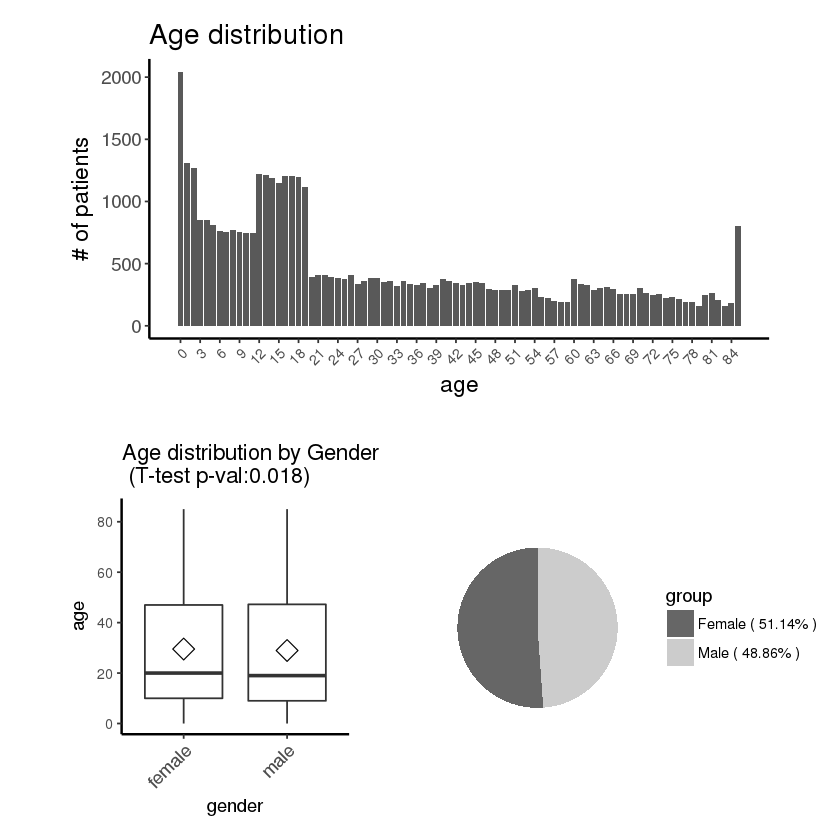

In [19]:
demographic.summary (input       = data2b2, 
                    maleCode    = "male", 
                    femaleCode  ="female")
summary(as.numeric(data2b2@iresult$Age))

# 3. Descriptive phenotypic analysis with __Rcupcake__

The function `phenotype.summary` performs a descriptive analysis of the phenotypic variables for the whole study population in general, and according to the status of one selected variation.

The `phenotype.summary` function requires 2 arguments:
* `input`: the data2b2 object, that is a `cupcakeData` object (`dataframe2cupcake` function output – see above).
* `variation`: determines the variation of interest, in this case the PCB153 exposure.
     
Although the function can show the results as figures and tables, we will only retrieve the table for this case study. We will set the `showTable` argument to `TRUE` and the `showFigure` one to `FALSE`.

In [20]:
phenotype.summary( input      = data2b2,
                   variation  = "PCB153", 
                   showTable  = TRUE, 
                   showFigure = FALSE)

,PhenotypeValue,phenotype,perc,confint,P_PCB153yes,P_yes,CI_yes,P_PCB153no,P_no,CI_no,yesno
1,,Diabetes,5.44,[5.2-5.7],32,0.52,[0.4-0.7],2226,6.3,[6-6.6],NA
2,No,Diabetes,88.71,[88.4-89],5634,91.94,[91.2-92.6],31159,88.15,[87.8-88.5],NA
3,Yes,Diabetes,5.84,[5.6-6.1],462,7.54,[6.9-8.2],1961,5.55,[5.3-5.8],NA
4,,liver_cancer,55.4,[54.9-55.9],2389,38.98,[37.8-40.2],20586,58.24,[57.7-58.8],NA
5,No,liver_cancer,44.57,[44.1-45],3738,61,[59.8-62.2],14746,41.72,[41.2-42.2],NA
6,Yes,liver_cancer,0.04,[0-0.1],1,0.02,[0-0.1],14,0.04,[0-0.1],NA
7,,arthritis,51.12,[50.6-51.6],2026,33.06,[31.9-34.3],19174,54.25,[53.7-54.8],NA
8,No,arthritis,36.29,[35.8-36.8],3051,49.79,[48.5-51],11998,33.94,[33.5-34.4],NA
9,Yes,arthritis,12.6,[12.3-12.9],1051,17.15,[16.2-18.1],4174,11.81,[11.5-12.1],NA
10,,Any.cancer,51.1,[50.6-51.6],2029,33.11,[31.9-34.3],19163,54.22,[53.7-54.7],NA


# 4. Univariate analysis with __Rcupcake__

The Rcupcake package also allows to perform a comparison two by two of a pair of variables in the `cupcakeData` object by applying the `comparison2b2` function. Applying this function we can easily see that:
* diabetes and PCB153 exposure are significantly associated(p-value 1.504e-06) 
* arthritis and PCB153 exposure are not significantly associated(p-value 0.8105) in the same population.


In [21]:
comparison2b2( 
    input     = data2b2, 
    variable1 = "P.Diabetes",
    variable2 = "V.PCB153"
)

P.Diabetes will be considered as a binary variable
V.PCB153 will be considered as a binary variable
Fisher test will be performed

 Contingency table:


          V.PCB153
P.Diabetes    no   yes   Sum
       No  31159  5634 36793
       Yes  1961   462  2423
       Sum 33120  6096 39216



 Proportion by row:


        No        Yes 
0.93821399 0.06178601 



	Fisher's Exact Test for Count Data

data:  contingencyTable
p-value = 1.504e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.170177 1.448553
sample estimates:
odds ratio 
   1.30295 


In [22]:
comparison2b2( 
    input     = data2b2, 
    variable1 = "P.arthritis",
    variable2 = "V.PCB153"
)

P.arthritis will be considered as a binary variable
V.PCB153 will be considered as a binary variable
Fisher test will be performed

 Contingency table:


           V.PCB153
P.arthritis    no   yes   Sum
        No  11998  3051 15049
        Yes  4174  1051  5225
        Sum 16172  4102 20274



 Proportion by row:


       No       Yes 
0.7422808 0.2577192 



	Fisher's Exact Test for Count Data

data:  contingencyTable
p-value = 0.8105
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9145334 1.0715875
sample estimates:
odds ratio 
 0.9901866 


# 5. Phenotypes co-occurrence and prevalence using __Rcupcake__: patients with PCB153 exposure

Finally, we will analyze the co-occurrence between the phenotypes according the exposure status. We will apply the `co.occurrence` function that identifies all the possible phenotype co-occurrence and quantify them according to five different quantification measures (Fisher test, comorbidity score, relative risk, Pearson correlation and odds ratio).

_Note that according to the type of study, the user can select the co-occurrence measures needed as well as the cut-off value. As a result of the phenotype co-occurrence analysis, a table containing the different-estimated measurements is obtained._

The co.occurrence function requires 6 arguments:
* `input`: the `cupcakeData` object, the data2b2 in this case.
* `pth`: the path where the file with the phenotype values generated previously is located.
* `aggregate`: if all the possible phenotype values want to be considered individually, aggregate must be `FALSE`. Otherwhise, the phenotype values should be manually completed by the user (column yes/no) and aggregate must be `TRUE`. In our case, we will set this argument as `FALSE` because all our phenotypes are yes/no, or nothing when no information is available for the phenotype.
* `ageRange`: determines what is the age range of interest for performing the analysis. In our case, we will select all the patients, so we put from 0 to 85.
* `gender`: determine what is the gender of interest for the co-occurrence analysis, in this case "ALL", because we do not want to distinguish between male and female. 
* `variation`: determine the variation of interest and its value, in this case PCB153 and yes, because we are interested in those patients that have been exposed to the PCB153.
    
    
The `co.occurrence` function output is a cupcakeResults object. This object shows us the conditions we have selected for the analysis (male and female from 0 to 85 years old and with PCB153 exposure). It also shows us a summary of the phenotype co-occurrence results, the prevalence of our disease of interest, the number of patients that have a PCB153, the range of co-occurrence measures and the number of comorbidities (43 in our case).

In [23]:
genophenoComorPCB153yes <- co.occurrence( 
              input         = data2b2,
              pth           = ".",
              aggregate    = FALSE, 
              ageRange      = c(0,85),
              gender        = "ALL", 
              variation      = c("PCB153", "yes")
              )
genophenoComorPCB153yes

Object of class 'cupcakeResults'
 . Age Min : 0 
 . Age Max : 85 
 . Gender  : ALL 
 . Variation : PCB153 yes 
 . Patients in the age and gender interval: 41474 
 . Patients with variation selected: 6128 
 . Prevalence: 14.776 
 . Odds ratio range: [0.018 , Inf] 
 . Relative risk range: [0.02 , 114.886] 
 . Phi range: [-0.07 , 1] 
 . Number of comorbidities: 43 

If we want to retrieve the table with the specific results for each phenotype co-occurrence, we can apply the `extract` function to the `cupcakeResults` object, as showed here :

In [24]:
head(extract(genophenoComorPCB153yes))

,phenotypeA,phenotypeB,patientsPhenoA,patientsPhenoB,patientsPhenoAB,patientsPhenoAnotB,patientsPhenoABnotA,patientsNotAnotBpheno,fisher,oddsRatio,relativeRisk,phi,expect,score,fdr,PercentagePhenoAB,sumRank
21,Any.cancer:,arthritis:,2029,2026,2022,7,4,39441,0,4503599627370496,20.4,0.997,99.116,4.337,0,33,1.5
24,arthritis:,Any.cancer:,2026,2029,2022,4,7,39441,0,4503599627370496,20.4,0.997,99.116,4.337,0,33,1.5
18,Any.cancer:,liver_cancer:,2029,2389,2029,0,360,39085,0,Inf,17.36,0.917,116.875,4.106,0,33.11,3.5
23,liver_cancer:,Any.cancer:,2389,2029,2029,360,0,39085,0,Inf,17.36,0.917,116.875,4.106,0,33.11,3.5
17,arthritis:,liver_cancer:,2026,2389,2022,4,367,39081,0,4503599627370496,17.326,0.915,116.702,4.103,0,33,5.5
20,liver_cancer:,arthritis:,2389,2026,2022,367,4,39081,0,4503599627370496,17.326,0.915,116.702,4.103,0,33,5.5


We can visualize the results with the cooc.heatmap and cooc.network functions. For this example, we will apply the cooc.heatmap function to visualize those phenotype co-occurrences that appear in at least 10% of the patients.
* `input`: the `genophenoComorPCB153yes` object
* `representedVariable`: the co-occurrence measurement 
* `variableCutOff`: the numeric value of the cutOff

The `cooc.heatmap` function output is a heatmap. Blue color represents the lower values, yellow color represents the upper values. The representedVariable value is shown in each cell.

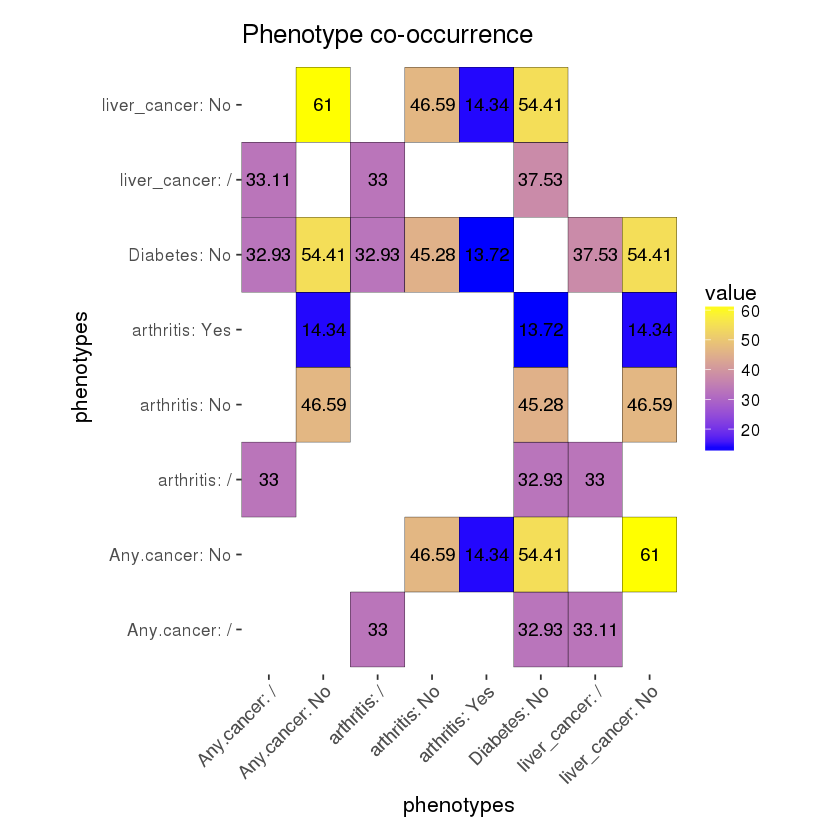

In [25]:
htmp <- cooc.heatmap( input               = genophenoComorPCB153yes,
                      representedVariable = "PercentagePhenoAB", 
                      variableCutOff      = 10, 
                      lowColor            = "blue", 
                      highColor           = "yellow")

htmp